In [89]:
from bs4 import BeautifulSoup
import requests
import re
import numpy as np

In [51]:
soup = BeautifulSoup

In [88]:
url = "https://www.linkedin.com/jobs/search/?currentJobId=3185915903&geoId=105117694&keywords=data%20scientist&location=Sweden&refresh=true&start="

In [222]:
def getlinks(url):
    soup = BeautifulSoup
    links=[]
    joblinks=[]
    for numbers in range(0,50,25):
        numbers=str(numbers)
        response = requests.get(url+numbers)
        soup = BeautifulSoup(response.text, 'html')
        for link in soup.find_all('a', href=True):
            links.append(link['href'])
        for things in links:
            if 'view' in things:
                joblinks.append(things)
    return joblinks

In [223]:
jobs=getlinks(url)

In [224]:
len(set(jobs))

50

In [225]:
jobs

['https://se.linkedin.com/jobs/view/senior-front-end-developer-ubisoft-connect-at-massive-entertainment-a-ubisoft-studio-3085535721?refId=p5NWAKsltncAI7ZhuG971w%3D%3D&trackingId=fxaNUvBc3eaVHw5gz3rhZA%3D%3D&position=1&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://se.linkedin.com/jobs/view/senior-frontend-developer-at-sharkmob-3158995364?refId=p5NWAKsltncAI7ZhuG971w%3D%3D&trackingId=ojXv08sKKRvdoxPmstK8EQ%3D%3D&position=2&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://se.linkedin.com/jobs/view/sr-node-js-react-developer-at-hcl-technologies-3198607372?refId=p5NWAKsltncAI7ZhuG971w%3D%3D&trackingId=vMrEbCczc99LPKuNsHHCYQ%3D%3D&position=3&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://se.linkedin.com/jobs/view/senior-web-developer-at-accedo-tv-3206141158?refId=p5NWAKsltncAI7ZhuG971w%3D%3D&trackingId=Jw1C%2Bj8LoV2j1UXCT3DR5A%3D%3D&position=4&pageNum=0&trk=public_jobs_jserp-result_search-card',
 'https://se.linkedin.com/jobs/view/senior-fronten

In [2]:
from bs4 import BeautifulSoup
import requests
import time
import re
import numpy as np

url_base = "https://www.linkedin.com/jobs-guest/jobs/api/seeMoreJobPostings/search?currentJobId=3235118914&keywords=data%2Bscientist&refresh=true&start="

session = requests.session()
base_sleep_duration = 2

def getlinks(url_base):
    links=[]
    for numbers in range(0,1000,25):
        number = str(numbers)
        url = url_base+number
        time_to_sleep = base_sleep_duration
        while True:
            response = session.get(url)
            if response.status_code == 429:
                print("Got rate-limited at index {}. Sleeping for {} seconds".format(number, time_to_sleep))
                time.sleep(time_to_sleep)
                time_to_sleep = 2*time_to_sleep
            else:
                break

        soup = BeautifulSoup(response.text, 'html.parser')
        current_links = []

        for link_obj in soup.find_all('a', href=True):
            link = link_obj['href']
            if "jobs/view" in link:
                links.append(link)
                current_links.append(link)

        if len(current_links) < 24:
            print("Panic!")
    return links

if __name__ == '__main__':
    links = getlinks(url_base)
    unique_links = set(links)
    unique_count = [0 for i in range(len(unique_links))]
    for link in links:
        for i, unique_link in enumerate(unique_links):
            if(unique_link == link):
                unique_count[i] = unique_count[i] + 1
   

Got rate-limited at index 125. Sleeping for 2 seconds
Got rate-limited at index 125. Sleeping for 4 seconds
Got rate-limited at index 250. Sleeping for 2 seconds
Got rate-limited at index 250. Sleeping for 4 seconds
Got rate-limited at index 375. Sleeping for 2 seconds
Got rate-limited at index 375. Sleeping for 4 seconds
Got rate-limited at index 500. Sleeping for 2 seconds
Got rate-limited at index 500. Sleeping for 4 seconds
Got rate-limited at index 625. Sleeping for 2 seconds
Got rate-limited at index 650. Sleeping for 2 seconds
Got rate-limited at index 775. Sleeping for 2 seconds
Got rate-limited at index 775. Sleeping for 4 seconds
Got rate-limited at index 900. Sleeping for 2 seconds
Got rate-limited at index 925. Sleeping for 2 seconds


In [119]:
def goThroughAds(data):
    skillist = [' Java ', ' C ', ' Python', ' C# ', ' R ', ' Tableau', 'Excel', ' SQL ', ' Snowflake']
    dictionary = {'skill': skillist}
    time_to_sleep=2
    for add in links[0:100]:
        job_description = requests.get(add)
        jobsoup = BeautifulSoup(job_description.text, 'html.parser')
        while True:
                response = requests.get(add)
                if response.status_code == 429:
                    time_to_sleep = base_sleep_duration
                    print("Got rate-limited at index. Sleeping for {} seconds".format(time_to_sleep))
                    time.sleep(time_to_sleep)
                    time_to_sleep = 2*time_to_sleep
                else:
                    break
        import re
        req = np.zeros(len(skillist))
        for i, elements in enumerate(skillist):
            requiredskills = re.findall(elements, job_description.text)
            if len(requiredskills) != 0:
                req[i]=1
        dictionary[jobsoup.title] = list(req)
        

In [87]:
import pandas as pd
jobdata = pd.DataFrame.from_dict(dictionary)
jobdata

,skill,"[Afterpay hiring Data Scientist in San Francisco, California, United States | LinkedIn]","[IBM hiring Entry Level - Associate Data Scientist (Commercial) in New York, New York, United States | LinkedIn]","[IBM hiring Entry Level - Associate Data Scientist (Commercial) in Washington, District of Columbia, United States | LinkedIn]","[Spotify hiring Data Scientist - Growth Analytics, Latin America in New York, New York, United States | LinkedIn]","[IBM hiring Entry Level - Associate Data Scientist (Commercial) in Chicago, Illinois, United States | LinkedIn]",NaN,"[IBM hiring Data Scientist - 2023 Entry Level Sales in San Francisco, California, United States | LinkedIn]","[IBM hiring Data Scientist - 2023 Entry Level Sales in Washington, District of Columbia, United States | LinkedIn]","[IBM hiring Entry Level - Associate Data Scientist (Commercial) in Atlanta, Georgia, United States | LinkedIn]",...,"[TikTok hiring Data Scientist - Strategy&Analytics, US Safety in Mountain View, California, United States | LinkedIn]","[Magnite hiring Data Scientist in Boston, Massachusetts, United States | LinkedIn]","[TikTok hiring Data Scientist, Research in Mountain View, California, United States | LinkedIn]","[The Home Depot hiring Data Scientist (Remote) in Atlanta, Georgia, United States | LinkedIn]","[Cisco hiring Data Scientist (Full Time) United States in Raleigh, North Carolina, United States | LinkedIn]","[Veeva Systems hiring Data Scientist in New York, New York, United States | LinkedIn]","[IBM hiring Entry Level - Associate Data Scientist (Federal) in Huntsville, Alabama, United States | LinkedIn]","[TikTok hiring Data Scientist - Analytics, US Safety in Los Angeles Metropolitan Area | LinkedIn]","[Photon hiring Data Scientist in Chicago, Illinois, United States | LinkedIn]","[Commerce Bank hiring Data Scientist (Remote/Hybrid/Flexible) in Kansas City, Missouri, United States | LinkedIn]"
0,Java,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Python,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0
3,C#,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,R,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Tableau,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,Excel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
7,SQL,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,Snowflake,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
jobdata['aggregate'] = jobdata.sum(axis=1)

C:\Users\Jesper\AppData\Local\Temp/ipykernel_13472/869186542.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  jobdata['aggregate'] = jobdata.sum(axis=1)


C:\Users\Jesper\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='aggregate'>

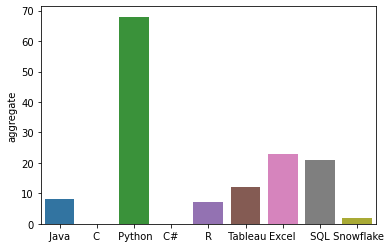

In [117]:
import seaborn as sns
sns.barplot(skillist, jobdata['aggregate'])